# Машинное обучение, ФКН ВШЭ

# Семинар 2

<img height="300" src="leecun.png">

# Линейная регрессия

В этом семинаре речь пойдёт о таком базовом инструменте анализа данных, как линейная регрессия. Несмотря на простоту, материал важен для изучения, т.к. содержит интересные приёмы анализа данных.

## Самостоятельное упражнение

В качестве разминки предлагается самостоятельно вывести формулу линейной регрессии для одномерного случая. Строго математически, задача ставится следующим образом.

Дано множество наблюдений $\{(x_i, y_i)\}_{i=1}^l$. Необходимо найти параметры $k,b$ в уравнении прямой $a(x) = kx + b$, которые минимизируют ошибку [RMSE](https://en.wikipedia.org/wiki/Root-mean-square_deviation) на множестве наблюдений.
$$RMSE = \sqrt{\frac{1}{l}\sum_{i=1}^l (y_i - a(x_i))^2}\rightarrow\min_{k,b}$$

## Векторное дифференцирование

Иногда, при взятии производных по вектору или от вектор-функций, удобно оперировать матричными операциями. Это сокращает запись и упрощает вывод формул.

Договоримся о некоторых обозначениях:
- При отображении вектора в число
$$f(x): \mathbb{R}^n \rightarrow \mathbb{R}$$

$$\frac{\partial f}{\partial x} = \bigg[\frac{\partial f}{\partial x_1}, \ldots, \frac{\partial f}{\partial x_n}\bigg]^T$$

- При отображении матрицы в число
$$f(x): \mathbb{R}^{n\times m} \rightarrow \mathbb{R}$$

$$\frac{\partial f}{\partial x} = \bigg(\frac{\partial f}{\partial x_{ij}}\bigg)_{i,j=1}^{n,m}$$

- При отображении вектора в вектор
$$f(x): \mathbb{R}^{n} \rightarrow \mathbb{R}^{m}$$

$$\frac{\partial f}{\partial x} = \bigg(\frac{\partial f_i}{\partial x_{j}}\bigg)_{i,j=1}^{m,n}$$

Теперь выведем некоторые формулы.

1. Пусть $a \in \mathbb{R}^n$ - вектор параметров, а $x \in \mathbb{R}^n$ - вектор переменных.

    $$\frac{\partial}{\partial x} a^Tx = ?$$

    $$\frac{\partial}{\partial x_i} a^Tx = \frac{\partial}{\partial x_i}\sum_j a_jx_j = a_i$$

    $$\frac{\partial}{\partial x} a^Tx = a$$

    Заметим, что $a^Tx$ — это число, поэтому $a^Tx = x^Ta$, следовательно,

    $$\frac{\partial}{\partial x} x^Ta = a.$$

1. Пусть теперь $A \in \mathbb{R}^{n\times n}$. Выведем ещё одну формулу

    $$\frac{\partial}{\partial x} x^TAx = ?$$
    
    $$\frac{\partial}{\partial x_i} x^TAx = \frac{\partial}{\partial x_i}\sum_j x_j (Ax)_j \; ,$$
    
    Здесь $(Ax)_j$ означает $j$-ый элемент вектора $Ax$.
    
    $$\frac{\partial}{\partial x_i} x^TAx = \frac{\partial}{\partial x_i}\sum_j x_j (Ax)_j = \frac{\partial}{\partial x_i}\sum_j x_j \bigg(\sum_k a_{jk}x_k\bigg) = $$
    
    $$ = \frac{\partial}{\partial x_i}\sum_j x_j \bigg(\sum_k a_{jk}x_k\bigg) = \frac{\partial}{\partial x_i}\sum_{j,k} a_{jk} x_j x_k =$$
    
    $$ = \sum_{j \neq i} a_{ji} x_j + \sum_{k \neq i} a_{ik} x_k + 2a_{ii}x_i = \sum_{j} a_{ji} x_j + \sum_{k} a_{ik} x_k = \sum_{j} (a_{ji} + a_{ij}) x_j$$
    
    $$\frac{\partial}{\partial x} x^TAx = (A + A^T)x$$
    
1. Теперь выведем формулу для определителя матрицы.

    $$\frac{\partial}{\partial A} \det A = ?$$
    
    $$\frac{\partial}{\partial A_{ij}} \det A = \frac{\partial}{\partial A_{ij}}\bigg[\sum_k (-1)^{i+k}A_{ik}M_{ik}\bigg] = (-1)^{i+j}M_{ij} \; ,$$
    
    где $M_{ik}$ - дополнительный минор матрицы $A$. Вспомним также формулу обратной матрицы
    
    $$(A^{-1})_{ij} = \frac{1}{\det A}(-1)^{i+j}M_{ji}.$$
    
    Получаем ответ
    
    $$\frac{\partial}{\partial A} \det A = (\det A) A^{-T} $$

1. И ещё одна полезная формула. Пусть $x \in \mathbb{R}^n, \, A \in \mathbb{R}^{n \times m}, \, y \in \mathbb{R}^m.$ Тогда

    $$\frac{\partial}{\partial A} x^TAy = ?$$
    
    $$\frac{\partial}{\partial A} x^TAy = \frac{\partial}{\partial A} \text{tr}(x^TAy) = \frac{\partial}{\partial A} \text{tr}(Ayx^T)$$
    
    Выведем вспомогательную формулу.
    
    $$\frac{\partial}{\partial A} \text{tr}(AB) = ?$$
    
    $$\frac{\partial}{\partial A_{ij}} \text{tr}(AB) = \frac{\partial}{\partial A_{ij}} \sum_k (AB)_{kk} = \frac{\partial}{\partial A_{ij}} \sum_{k,l} A_{kl}B_{lk} = B_{ji}$$
    
    $$\frac{\partial}{\partial A} \text{tr}(AB) = B^T$$
    
    Отсюда
    
    $$\frac{\partial}{\partial A} x^TAy = \frac{\partial}{\partial A} \text{tr}(Ayx^T) = xy^T$$

## Вывод для многомерного случая

В общем случае мы имеем выборку $\{(x_i, y_i)\}_{i=1}^l$, где $x_i \in \mathbb{R}^d\; \forall i$, $y_i \in \mathbb{R}\; \forall i$, и хотим найти наилучшие параметры модели $a(x) = \langle w, x \rangle$ с точки зрения минимизации функции ошибки

$$Q(w) = (y - Xw)^T(y - Xw).$$

Здесь $X\in \mathbb{R}^{l \times d}$ — матрица "объекты-признаки" для обучающей выборки, $y \in \mathbb{R}^l$ — вектор значений целевой переменной на обучающей выборке, $w \in \mathbb{R}^d$ — вектор параметров. Везде далее будем предполагать, что $X$ имеет полный ранг и что $l > d$ (количество объектов больше, чем количество признаков). 

Выпишем градиент функции ошибки по $w$

$$\frac{\partial}{\partial w} Q(w) = \frac{\partial}{\partial w}[y^Ty - y^TXw - w^TX^Ty + w^TX^TXw].$$

Продифференцируем каждое слагаемое отдельно.

$$\frac{\partial}{\partial w}\bigg[y^Ty\bigg] = 0$$

$$\frac{\partial}{\partial w}\bigg[ - y^TXw\bigg] = - X^Ty$$

$$\frac{\partial}{\partial w}\bigg[ - w^TX^Ty\bigg] = - X^Ty$$

$$\frac{\partial}{\partial w}\bigg[w^TX^TXw\bigg] = (X^TX + X^TX)w$$

Получаем уравнение

$$\frac{\partial}{\partial w} Q(w) = -2X^Ty + 2X^TXw = 0$$

Тогда искомый вектор параметров выражается как

$$w = (X^TX)^{-1}X^Ty$$

Заметим, что это общая формула, и нет необходимости выводить формулу для регрессии вида $a(x) = Xw + w_0$, т.к. мы всегда можем добавить признак (столбец матрицы $X$), который всегда будет равен $1$, и по уже выведенной формуле найдём параметр $w_0$.

После вывода этой формулы напрашиваются логичные вопросы:
- **Почему это минимум?**
- **Почему он существует?**

Ответим сначала на первый вопрос. Из курса математического анализа мы знаем, что если матрица Гессе функции положительно определёна в точке экстремума, то эта точка является локальным минимумом.

$$\frac{\partial^2}{\partial w^2} Q(w) = 2X^TX$$

Теперь необходимо понять, является ли матрица $X^TX$ положительно определённой. Запишем определение положительной определённости матрицы  $X^TX$.

$$z^TX^TXz > 0, \; \forall z \in \mathbb{R}^d, z \ne 0.$$

Видим, что тут записан квадрат нормы вектора $Xz$, тогда это выражение не будет меньше нуля. Учитывая, что матрица $X$ имеет "книжную" ориентацию (строк больше, чем столбцов), и имеет полный ранг (нет линейно зависимых столбцов), то вектор $Xz$ не может быть нулевым, а значит выполняется

$$z^TX^TXz = ||Xz||^2 > 0, \; \forall z \in \mathbb{R}^d, z \ne 0.$$

Также мы "бесплатно" получаем ответ на второй вопрос. По критерию Сильвестра, все главные миноры положительно определённой матрицы должны быть положительными, а, следовательно, определитель самой матрицы положителен, следовательно, матрица $X^TX$ обратима, и решение существует!

## Градиентный спуск

В итоговой формуле для параметров регрессии присутствует обращение матрицы $X^TX$ - очень трудоёмкая операция при большом количестве признаков.

Выпишем ещё раз формулу параметров линейной модели. 

$$w = (X^TX)^{-1}X^Ty$$

Нетрудно подсчитать, что сложность вычислений $O(d^3 + dl)$.

Формула градиента функции ошибки

$$\frac{\partial}{\partial w} Q(w) = -2X^Ty + 2X^TXw = 2X^T(Xw - y)$$
 
Сложность вычислений в данном случае $O(dl)$.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import time
from IPython import display

from tqdm import tqdm
from sklearn.metrics import mean_squared_error as mse

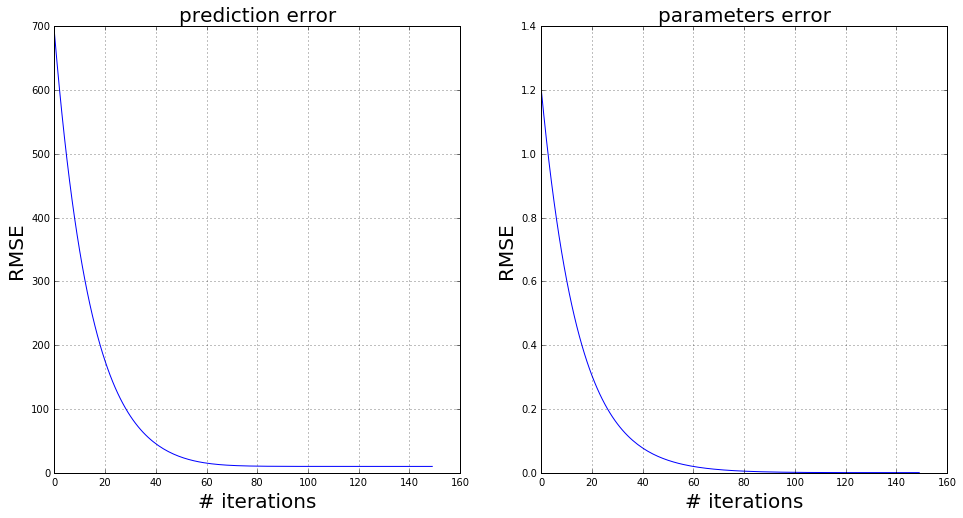

In [3]:
n_features = int(1e2)
n_objects = int(1e5)
num_steps = 150

w_true = np.random.uniform(-2,2, (n_features, 1))

X = np.random.uniform(-100,100, (n_objects, n_features))
Y = X.dot(w_true) + np.random.normal(0,10, (n_objects, 1))

w = np.random.uniform(0,1, (n_features, 1))
alpha = 1e-10
w_errors = np.zeros(num_steps)
test_errors = np.zeros(num_steps)

plt.figure(figsize=(16,8))
for i in range(num_steps):
    grad = 2*(X.T).dot(X.dot(w) - Y)
    w = w - alpha * grad
    test_errors[i] = np.sqrt(mse(Y, X.dot(w)))
    w_errors[i] = np.sqrt(mse(w, w_true))
    
    plt.clf()
    plt.subplot(121)
    plt.plot(test_errors)
    plt.xlabel('# iterations', fontsize=20)
    plt.ylabel('RMSE', fontsize=20)
    plt.title('prediction error', fontsize=20)
    plt.grid()
    
    plt.subplot(122)
    plt.plot(w_errors)
    plt.xlabel('# iterations', fontsize=20)
    plt.ylabel('RMSE', fontsize=20)
    plt.title('parameters error', fontsize=20)
    plt.grid()
    display.clear_output(wait=True)
    display.display(plt.gcf())
    
_ = plt.clf()

## Небольшая история

В 16 веке [Галилео Галилей](https://ru.wikipedia.org/wiki/Галилей,_Галилео) изучал законы механики, и, в частности, законы падения тел. Он хотел установить зависимость между пройденным путём свободно падающего тела и временем его падения. Так как в то время не было достаточно точных инструментов для измерения времени падения тела, Галилей поставил другой эксперимент. А именно, он скатывал бронзовый шар с наклонной плоскости, замерял пройденный им путь и затраченное на это время (время Галилей измерял с помощью [водяных часов](https://ru.wikipedia.org/wiki/Водяные_часы)).

<img src="ball.png">

К сожалению, лабораторных таблиц Галилея у нас нет, но мы можем с лёгкостью смоделировать данный эксперимент.

In [4]:
n_exps = 100

g = 9.81
a = np.sin(np.pi / 6.0) * g
t = np.linspace(1,5, n_exps)
x = a*t**2/2 + np.random.normal(0,2,n_exps)

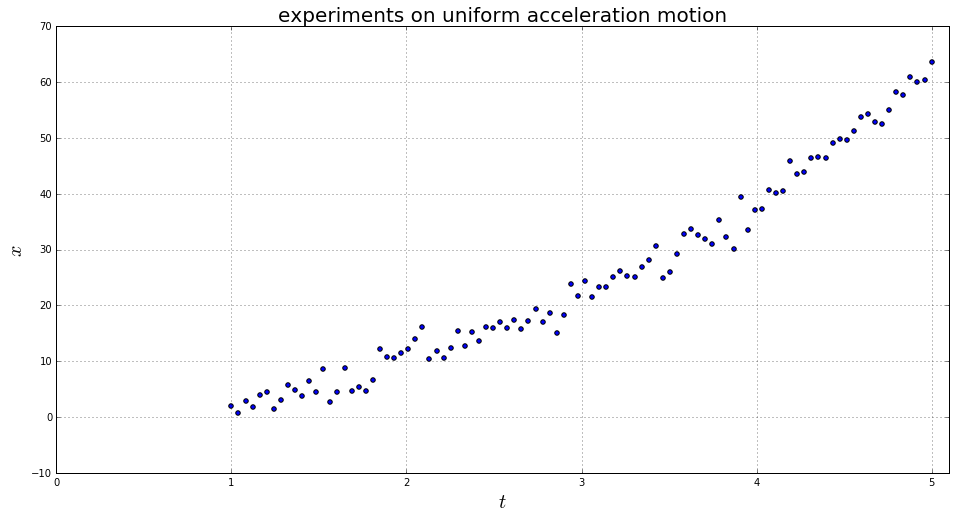

In [5]:
figsize(16,8)
plt.scatter(t,x)

plt.title('experiments on uniform acceleration motion', fontsize=20)
plt.xlabel('$t$', fontsize=20)
plt.ylabel('$x$', fontsize=20)
plt.xlim(0.0, 5.1)
plt.grid()

Как и ожидалось, это парабола. Но Галилей не знал этого, а к тому же был культурным и образованым человеком, и ему необходимы были строгие доказательства.

[comment]: <> (<img src="http://picscomment.com/wp-content/themes/bunker/inc/download.php?file=35311433416143.jpg">)

Поэтому он построил следующий график

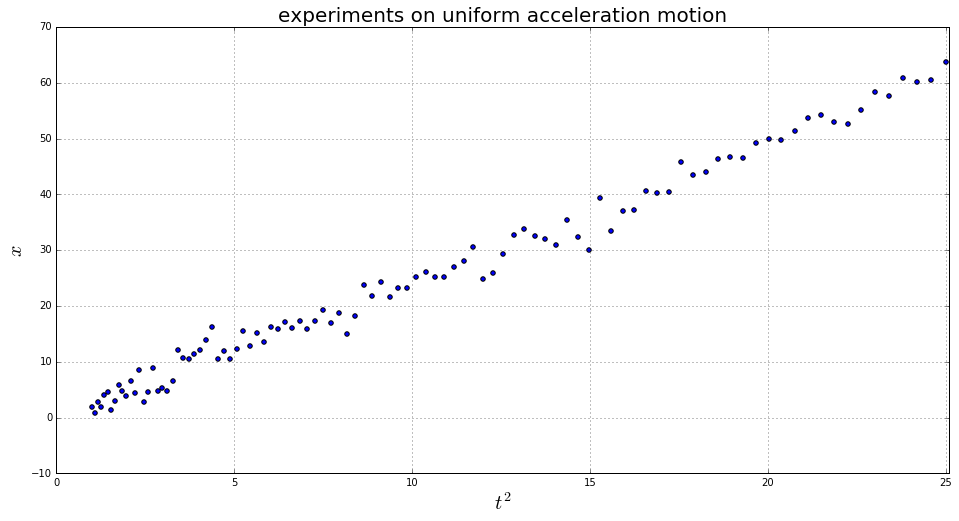

In [6]:
figsize(16,8)
plt.scatter(t**2,x)

plt.title('experiments on uniform acceleration motion', fontsize=20)
plt.xlabel('$t^2$', fontsize=20)
plt.ylabel('$x$', fontsize=20)
plt.xlim(0.0, 25.1)
plt.grid()

Несмотря на свою простоту, этот приём не такой очевидный, каким может показаться на первый взгляд. И к тому же очень полезный!

Дело в том, что к такому графику вы можете приложить линейку и понять, что это прямая (во времена Галлилея). Также существуют стандартные статистические тесты для проверки такой гипотезы (в наше время). В случае с параболой всё усложняется, поэтому необходимо помнить про этот приём.

Оказывается, что линейная регрессия — это очень мощный инструмент, если мы можем подбирать коэффициенты степенного ряда. Таким образом мы можем приближать любую функцию, не зная её вид, а подбирая коэффициенты в ряде Тейлора.

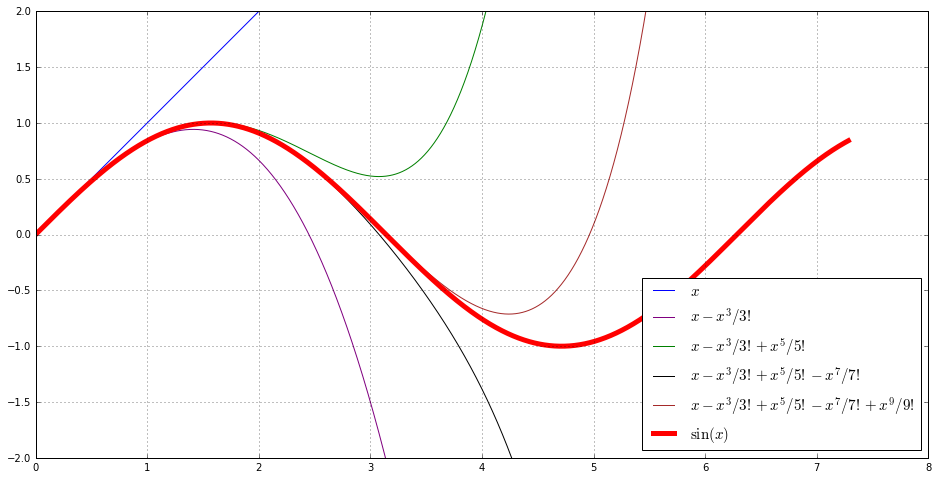

In [7]:
x = np.arange(0, 2*np.pi + 1, 0.001)
y_1 = x
y_2 = x - x**3 / np.math.factorial(3)
y_3 = x - x**3 / np.math.factorial(3) + x**5 / np.math.factorial(5)
y_4 = x - x**3 / np.math.factorial(3) + x**5 / np.math.factorial(5) - x**7 / np.math.factorial(7)
y_5 = x - x**3 / np.math.factorial(3) + x**5 / np.math.factorial(5) - x**7 / np.math.factorial(7) \
    + x**9 / np.math.factorial(9)

figsize(16,8)
plt.ylim(-2.,2.)
plt.plot(x,y_1,color='blue',label='$x$')
plt.plot(x,y_2,'purple',label='$x - x^3/3!$')
plt.plot(x,y_3,'green',label='$x - x^3/3! + x^5/5!$')
plt.plot(x,y_4,'black',label='$x - x^3/3! + x^5/5! - x^7/7!$')
plt.plot(x,y_5,'brown',label='$x - x^3/3! + x^5/5! - x^7/7! + x^9/9!$')
plt.plot(x,np.sin(x),color='r',lw=5,label='$\sin(x)$')
plt.legend(fontsize=15, loc=4)
plt.grid()

## Линейная регрессия из коробки

Наконец, необходимо уметь запускать линейную регрессию из коробки (в нашем случае из scikit-learn). Но при запуске необходимо читать что внутри! В качестве примера сравним время настройки одной и той же модели, но двумя разными методами. Сравним объект LinearRegression, и объект Ridge. LinearRegression решает обычную задачу линейной регрессии, а объект Ridge добавляет $L_2$ регуляризацию весов.

Помимо времени работы сравним получаемые коэффициенты детерминации $R^2$.

$$R^2 = 1 - \frac{\sum_i (y_i - a(x_i))^2}{\sum_i (y_i - \overline{y}_i)^2} = 1 - \frac{\text{Var} (Y|X)}{\text{Var} Y}$$

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

In [9]:
%%time

n_features = int(1e2)
n_objects = int(1e5)
num_steps = 150

theta_true = np.random.uniform(-2,2, (n_features, 1))

X = np.random.uniform(-100,100, (n_objects, n_features))
Y = X.dot(theta_true) + np.random.normal(0,10, (n_objects, 1))

lr = LinearRegression()
lr.fit(X,Y)
print 'R2: %f' % lr.score(X,Y)

R2: 0.999745
CPU times: user 1.97 s, sys: 113 ms, total: 2.09 s
Wall time: 1.6 s


In [10]:
%%time

n_features = int(1e2)
n_objects = int(1e5)
num_steps = 150

theta_true = np.random.uniform(-2,2, (n_features, 1))

X = np.random.uniform(-100,100, (n_objects, n_features))
Y = X.dot(theta_true) + np.random.normal(0,10, (n_objects, 1))

lr = Ridge(alpha=0.0, solver='sparse_cg')
lr.fit(X,Y)
print 'R2: %f' % lr.score(X,Y)

R2: 0.999739
CPU times: user 265 ms, sys: 20.5 ms, total: 285 ms
Wall time: 268 ms


Даже на игрушечном примере разница работы во времени в 5 раз. И получается это за счёт метода минимизации функции ошибки. В объекте LinearRegression задача решается явным образом - через обращение матрицы, а в объекте Ridge применяются более сложные методы решения (в данном случае мы использовали метод сопряжённого градиента).